<br>
<br>

#### Reading the Training Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


df_train = pd.read_csv('train_lyrics_1000.csv')
df_test = pd.read_csv('valid_lyrics_200.csv')

df_train.tail()

,file,artist,title,lyrics,genre,mood,year
995,TRBIGRY128F42597B3.h5,Sade,All About Our Love,Its all about our love\nSo shall it be forever...,R&B,sad,2000
996,TRBIIEU128F9307C88.h5,New Found Glory,Don't Let Her Pull You Down,It's time that I rain on your parade\nWatch as...,Rock,happy,2009
997,TRBIIJY12903CE4755.h5,Mindy McCready,Ten Thousand Angels,Speakin of the devil\nLook who just walked in\...,Country,happy,1996
998,TRBIIOT128F423C594.h5,Joy Division,Leaders Of Men,Born from some mother's womb\nJust like any ot...,Rock,sad,1978
999,TRBIJYB128F14AE326.h5,Seventh Day Slumber,Shattered Life,"This wanting more from me is tearing me, it's ...",Rock,sad,2005


In [2]:
df_train.shape

(1000, 7)

In [3]:
df_test.shape

(200, 6)

In [4]:
df_test.head()

,file,artist,title,genre,lyrics,mood
0,TRAFAIB128F426E636.h5,Placebo,Where Is My Mind (XFM Live Version),Pop,Ooooohh\nOoooohh\nOoooohh\nOoooohh\n\nWith you...,happy
1,TRAFAJC128E078888B.h5,Queens Of The Stone Age,This Lullaby,Rock,"Where, oh, where have you been, my love?\nWher...",sad
2,TRAFBBP128F92F6CC9.h5,MC5,Looking At You (Cody High School),Rock,When it happened \nsomething snapped inside \n...,happy
3,TRAFBVU128F426B3F6.h5,Dimmu Borgir,The Fundamental Alienation,Rock,My eyes got blinded\nAnd conned by the light\n...,sad
4,TRAFEEO12903CFEC87.h5,Dark Fortress,The Silver Gate,Rock,"[Music: V Santura, Lyrics: Morean]\n\nAwake, a...",sad


In [5]:
set(df_test["mood"])

{'happy', 'sad'}

In [6]:
X_train = df_train['lyrics']
y_train = df_train['mood']

X_test = df_test['lyrics']
y_test = df_test['mood']

In [7]:
# Label encoder

import pickle
import numpy as np

pickle_in = open('./label_encoder.p', 'rb')
le = pickle.load(pickle_in)
pickle_in.close()

print('before: %s ...' %y_train[:5])

y_train = le.transform(y_train)
y_test = le.transform(y_test)

print('after: %s ...' %y_train[:5])

before: 0      sad
1    happy
2      sad
3    happy
4      sad
Name: mood, dtype: object ...
after: [1 0 1 0 1] ...


# Text Preprocessing

In [8]:
import pickle
stop_words = pickle.load(open('./stopwords.p', 'rb'))
semantic_words = pickle.load(open('./whitelist_dicts/semantic_words_py34.p', 'rb'))

<br>
<br>

### Transform texts into bag of words models - Trying different tokenizers

In [9]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

porter = PorterStemmer()
snowball = EnglishStemmer()

# raw words
tokenizer = lambda text: text.split()

# words after Porter stemming 
tokenizer_porter = lambda text: [porter.stem(word) for word in text.split()]

# Words after Snowball stemming
tokenizer_snowball = lambda text: [snowball.stem(word) for word in text.split()]

# Only words that are in a list of 'positive' or 'negative' words ('whitelist')
# http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon
tokenizer_whitelist = lambda text: [word for word in text.split() if word in semantic_words]

# Porter-stemmed words in whitelist
tokenizer_porter_wl = lambda text: [porter.stem(word) for word in text.split() if word in semantic_words]

# Snowball-stemmed words in whitelist
tokenizer_snowball_wl = lambda text: [snowball.stem(word) for word in text.split() if word in semantic_words]

### Looking at vocabulary sizes

In [24]:
import re
import mlxtend
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from mlxtend.preprocessing import DenseTransformer

vect_1 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_2 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_3 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)  

vect_4 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)  

vect_5 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_6 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

vect_7 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_8 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_9 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)

vect_10 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)    

vect_11 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_12 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)


pipelines = []
vectorizers = [vect_1, vect_2, vect_3, vect_4, vect_5, vect_6, vect_7, vect_8, vect_9, vect_10, vect_11, vect_12]
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
for v in vectorizers:
    pipelines.append(Pipeline([('vect', v),
                               ('dense', DenseTransformer()),
                               ('clf',RandomForestClassifier())]))

In [25]:
# done before max_features was set

print('Vocabulary sizes\n')
labels = ['CountVec', 'CountVec porter', 'CountVec snowball', 'CountVec wl', 'CountVec porter+wl','CountVec snowball+wl',
          'TfidfVec', 'TfidfVec porter', 'TfidfVec snowball', 'TfidfVec wl', 'TfidfVec porter+wl','TfidfVec snowball+wl',]

for label, v in zip(labels, vectorizers):
    v.fit(X_train)
    print('%s: %s' % (label, len(v.vocabulary_)))

Vocabulary sizes

CountVec: 11378
CountVec porter: 8551
CountVec snowball: 8528
CountVec wl: 1666
CountVec porter+wl: 1349
CountVec snowball+wl: 1332
TfidfVec: 11378
TfidfVec porter: 8551
TfidfVec snowball: 8528
TfidfVec wl: 1666
TfidfVec porter+wl: 1349
TfidfVec snowball+wl: 1332


# Model Selection

### Feature Extraction - Cross Validation Error

In [26]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

labels = ['CountVec', 'CountVec porter', 'CountVec snowball', 'CountVec wl', 'CountVec porter+wl','CountVec snowball+wl',
          'TfidfVec', 'TfidfVec porter', 'TfidfVec snowball', 'TfidfVec wl', 'TfidfVec porter+wl','TfidfVec snowball+wl',]



d = {'Data':labels,
     'ROC AUC (%)':[],}

for i,clf in enumerate(pipelines):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring='roc_auc', cv=10)
    print('clf %s, %s: %s' % (i+1, labels[i], scores.mean()*100))
    d['ROC AUC (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

clf 1, CountVec: 72.01779401154401
clf 2, CountVec porter: 73.72390873015873
clf 3, CountVec snowball: 73.2554743867244
clf 4, CountVec wl: 68.14885461760463
clf 5, CountVec porter+wl: 69.3327380952381
clf 6, CountVec snowball+wl: 68.55391414141414
clf 7, TfidfVec: 70.22784992784995
clf 8, TfidfVec porter: 74.54566197691197
clf 9, TfidfVec snowball: 72.85374278499278
clf 10, TfidfVec wl: 67.15810786435787
clf 11, TfidfVec porter+wl: 67.82792207792208
clf 12, TfidfVec snowball+wl: 68.72653318903319


In [27]:
from sklearn.model_selection import cross_val_predict
y_predict=cross_val_predict(clf,X_test,y_test)
y_predict

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

#### input and output

In [28]:
d={0:"happy",1:"sad"}
print("your selected lyrics :",X_test[1])
print("\r")
print("\r")
print("model prediction :",d[y_predict[1]])

your selected lyrics : Where, oh, where have you been, my love?
Where, oh, where can you be?
It's been so long since the moon has gone
And, oh, what a wreck you've made me

Are you there over the ocean?
Are you there up in the sky?
Until the return of my love
This lullaby

My hope is on the horizon
Every face, your eyes I can see
I plead and I pray through each night and day
Our embrace is only a dream

And as sure as days come from moments
Each hour becomes a life's time
When she'd left I'd only begun
This lullaby


model prediction : happy


In [29]:
from sklearn.metrics import accuracy_score
print("accuracy_score of our model :",accuracy_score(y_test,y_predict))

accuracy_score of our model : 0.63


Text(0.5, 1, 'Confusion matrix')

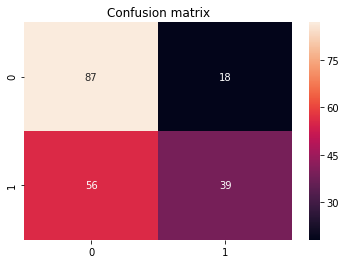

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)
sns.heatmap(c,annot=True,fmt='d')
plt.title("Confusion matrix")

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
#df_perform.to_csv('./random_forests_data/rand_forest_featextr_1.csv', index=False)

<br>
<br>

<br>
<br>